<a href="https://colab.research.google.com/github/prinsikakadiya/CodeClause_CreditCardFraudDetection/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
!pip install -q kaggle

In [57]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"prinsikakadiya","key":"03479571ffddf69974fb2a45778afc49"}'}

In [58]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [59]:
! cp kaggle.json ~/.kaggle/

In [60]:
! chmod 600 ~/.kaggle/kaggle.json

In [61]:
! kaggle datasets list

ref                                                               title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
alphiree/cardiovascular-diseases-risk-prediction-dataset          Cardiovascular Diseases Risk Prediction Dataset       5MB  2023-07-03 12:12:19           1756         75  1.0              
nelgiriyewithana/countries-of-the-world-2023                      Global Country Information Dataset 2023              23KB  2023-07-08 20:37:33            680         34  1.0              
arnavsmayan/netflix-userbase-dataset                              Netflix Userbase Dataset                             25KB  2023-07-04 07:38:41           1871         49  1.0              
aaditshukla/flipkart-fasion-products-dataset      

In [62]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [63]:
!unzip creditcardfraud.zip

Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


**create dataframe**

In [64]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


preprocessing

In [65]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [67]:
df.shape

(284807, 31)

In [68]:
df.size

8829017

In [96]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [69]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [70]:
# No Null Value
df.isnull().sum().max()

0

<Axes: >

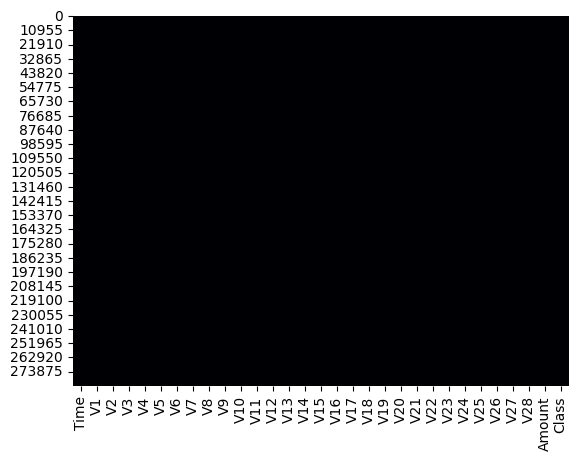

In [71]:
#for null value
import seaborn as sns
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False)

In [72]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [73]:
class_count = df['Class'].value_counts()
class_count

0    284315
1       492
Name: Class, dtype: int64

In [74]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


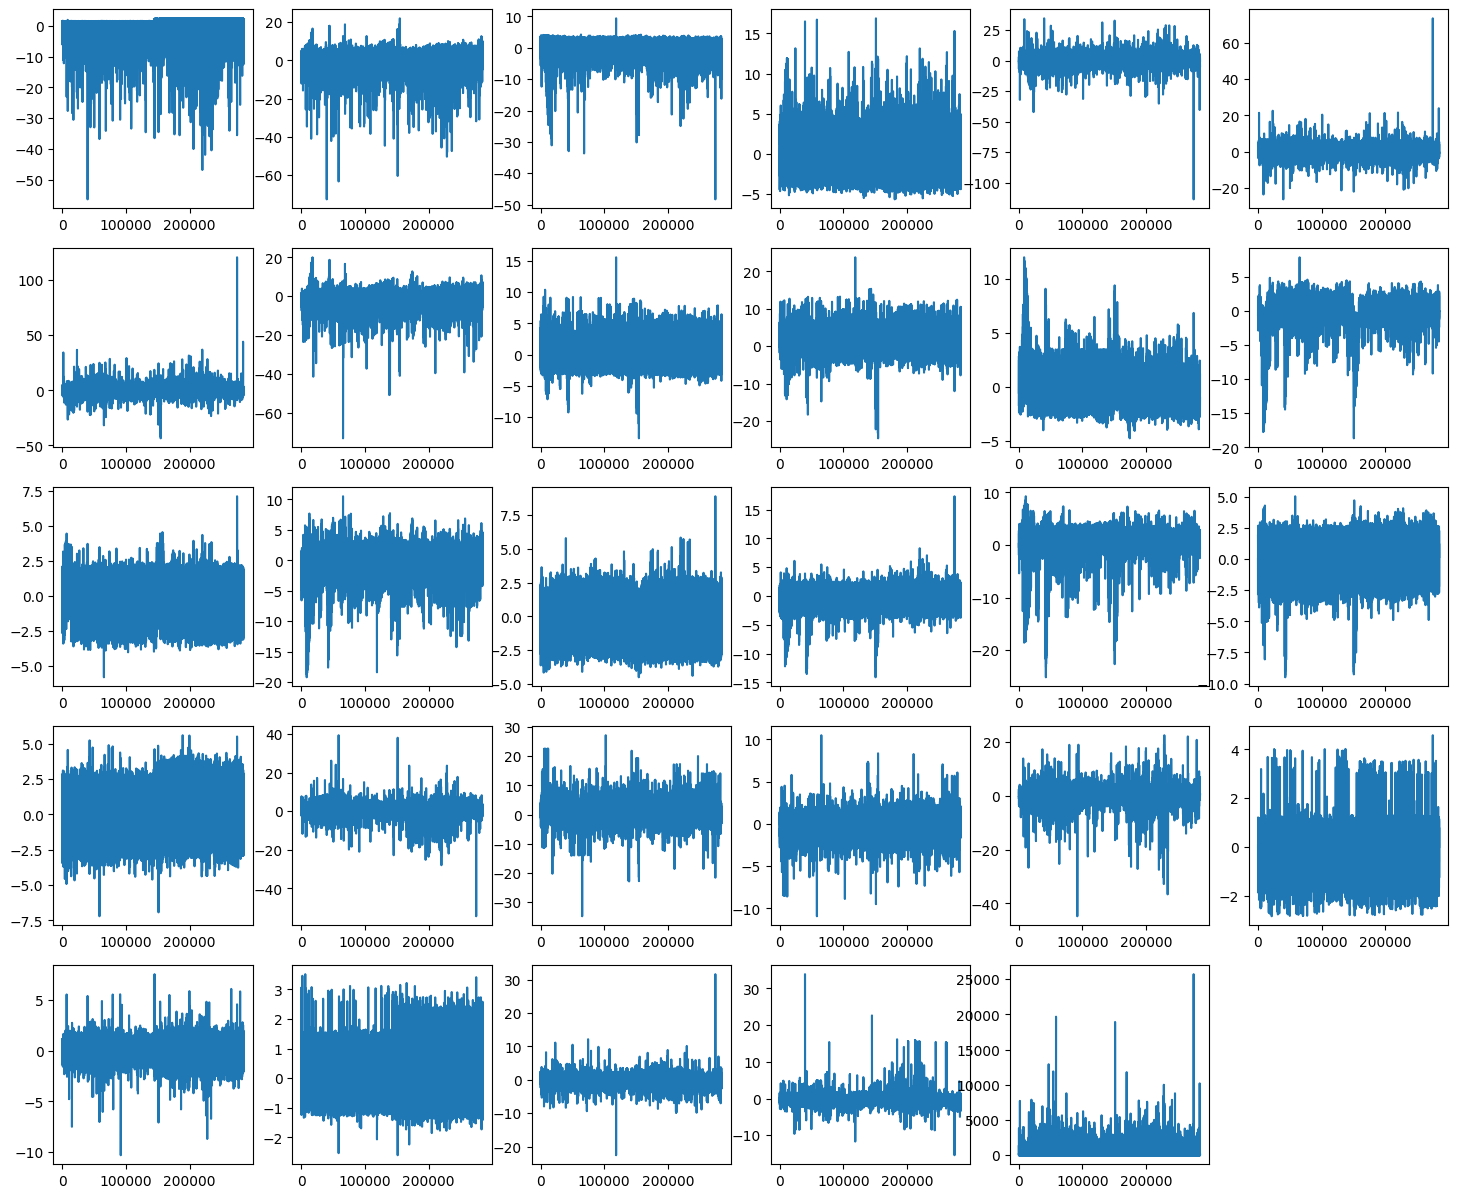

In [75]:
#Plotting the variables using subplots

from matplotlib import pyplot as plt
fig = plt.figure(figsize = (18, 15))

plt.subplot(5, 6, 1) ; plt.plot(df.V1) ; plt.subplot(5, 6, 15) ; plt.plot(df.V15)
plt.subplot(5, 6, 2) ; plt.plot(df.V2) ; plt.subplot(5, 6, 16) ; plt.plot(df.V16)
plt.subplot(5, 6, 3) ; plt.plot(df.V3) ; plt.subplot(5, 6, 17) ; plt.plot(df.V17)
plt.subplot(5, 6, 4) ; plt.plot(df.V4) ; plt.subplot(5, 6, 18) ; plt.plot(df.V18)
plt.subplot(5, 6, 5) ; plt.plot(df.V5) ; plt.subplot(5, 6, 19) ; plt.plot(df.V19)
plt.subplot(5, 6, 6) ; plt.plot(df.V6) ; plt.subplot(5, 6, 20) ; plt.plot(df.V20)
plt.subplot(5, 6, 7) ; plt.plot(df.V7) ; plt.subplot(5, 6, 21) ; plt.plot(df.V21)
plt.subplot(5, 6, 8) ; plt.plot(df.V8) ; plt.subplot(5, 6, 22) ; plt.plot(df.V22)
plt.subplot(5, 6, 9) ; plt.plot(df.V9) ; plt.subplot(5, 6, 23) ; plt.plot(df.V23)
plt.subplot(5, 6, 10) ; plt.plot(df.V10) ; plt.subplot(5, 6, 24) ; plt.plot(df.V24)
plt.subplot(5, 6, 11) ; plt.plot(df.V11) ; plt.subplot(5, 6, 25) ; plt.plot(df.V25)
plt.subplot(5, 6, 12) ; plt.plot(df.V12) ; plt.subplot(5, 6, 26) ; plt.plot(df.V26)
plt.subplot(5, 6, 13) ; plt.plot(df.V13) ; plt.subplot(5, 6, 27) ; plt.plot(df.V27)
plt.subplot(5, 6, 14) ; plt.plot(df.V14) ; plt.subplot(5, 6, 28) ; plt.plot(df.V28)
plt.subplot(5, 6, 29) ; plt.plot(df.Amount)
plt.show()


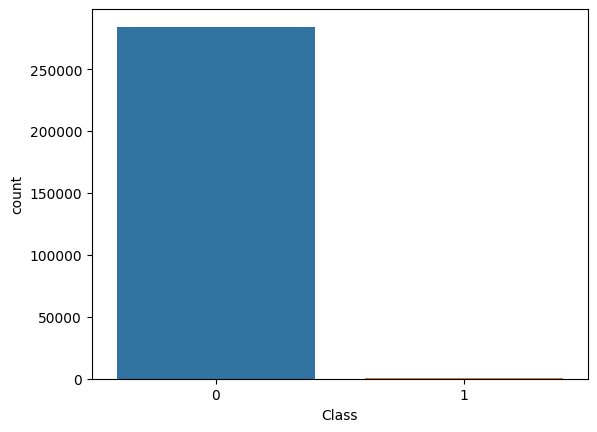

In [76]:
# count plot on single categorical variable
sns.countplot(x ='Class', data = df)

# Show the plot
plt.show()

**Divide data into input and output**

In [77]:
X = df.drop(columns = ["Class"])
y = df["Class"]

**Data Balancing**

In [78]:
!sudo pip install imbalanced-learn

In [79]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X,y=smote.fit_resample(X,y)

In [80]:
y.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [81]:
X.value_counts()

Time      V1          V2          V3          V4         V5          V6         V7          V8          V9         V10         V11        V12         V13        V14         V15        V16         V17         V18        V19        V20        V21         V22        V23        V24        V25        V26        V27        V28        Amount
68207.0   -13.192671   12.785971  -9.906650    3.320337  -4.801176    5.760059  -18.750889  -37.353443  -0.391540  -5.052502    4.406806  -4.610756   -1.909488  -9.072711   -0.226074  -6.211557   -6.248145   -3.149247   0.051576  -3.493050   27.202839  -8.887017   5.303607  -0.639435   0.263203  -0.108877   1.269566   0.939407  1.00      3650
94362.0   -26.457745   16.497472  -30.177317   8.904157  -17.892600  -1.227904  -31.197329  -11.438920  -9.462573  -22.187089   4.419997  -10.592305  -0.703796  -3.926207   -2.400246  -6.809890   -12.462315  -5.501051  -0.567940   2.812241  -8.755698    3.460893   0.896538   0.254836  -0.738097  -0.966564  -7.263482 

**Train and test variable**

In [82]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state = 0)

#x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state = 1)
print("Length of x_train is: {x_train}".format(x_train = len(x_train)))
print("Length of x_test is: {x_test}".format(x_test = len(x_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of x_train is: 398041
Length of x_test is: 170589
Length of y_train is: 398041
Length of y_test is: 170589


In [83]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
212637,138937.000000,-0.217237,1.214642,-0.867900,-0.534643,0.705577,-0.789080,0.598961,0.338160,-0.181912,...,-0.067125,-0.307740,-0.899593,0.138107,0.365361,-0.370734,0.127667,0.094900,0.012701,8.990000
535831,64327.651965,0.640968,0.694896,0.116394,2.400319,0.240397,0.019262,0.363475,0.096582,-0.830117,...,0.091581,0.080278,0.151808,0.050339,-0.218686,0.279936,0.045692,0.004297,0.031057,74.158146
182914,125582.000000,-1.133353,0.807346,0.335179,-0.246120,1.907576,-0.457185,1.363960,-0.107106,-0.527933,...,-0.281522,0.002291,-0.095884,-0.657837,0.141620,1.370342,-0.455861,-0.146808,0.065861,16.950000
402648,138210.218232,-1.093622,1.508466,-5.821521,1.944560,-2.282682,0.797717,-1.684846,1.296227,-1.415856,...,0.263532,0.758037,0.377109,0.600361,-0.611856,-0.946303,-0.006361,1.013711,0.390676,436.862931
80440,58488.000000,-0.405486,1.045438,1.157308,-0.183143,0.467022,0.003578,0.542278,0.215311,-0.685132,...,0.124452,-0.202287,-0.496122,-0.042902,-0.350461,-0.208719,0.103399,0.260089,0.082109,2.670000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,93933.332166,-10.886893,7.167453,-16.944234,6.638431,-9.571612,-4.431197,-15.431298,2.901327,-4.695260,...,0.164342,0.883760,1.202615,-0.190164,0.552760,-0.839721,-0.450541,-1.138456,-0.257540,6.556684
152315,97253.000000,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,...,0.146098,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471,171.310000
117952,74887.000000,-0.589400,0.747828,1.784781,0.899612,0.257067,-0.001301,0.122334,0.034736,-0.283998,...,0.047357,-0.008910,0.000367,-0.238139,-0.463529,-0.243573,-0.370920,0.086592,0.118084,15.990000
435829,35904.775916,-3.241433,4.111543,-4.271176,5.574219,-3.752787,-1.195267,-6.442060,2.496472,-4.757940,...,0.882771,1.617661,0.889702,-0.150178,0.007704,0.038103,0.404174,0.870827,0.518344,5.638891


In [84]:
y_train

212637    0
535831    1
182914    0
402648    1
80440     0
         ..
359783    1
152315    0
117952    0
435829    1
305711    1
Name: Class, Length: 398041, dtype: int64

In [85]:
x_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
484657,91128.045508,-3.792956,3.684282,-3.103556,0.757730,-0.418444,1.756317,-3.054947,-9.673230,2.288764,...,-2.483475,9.117580,-2.631141,1.379002,-0.024622,-0.468951,-0.593272,0.411846,0.217646,137.882403
409771,93879.000000,-12.833631,7.508790,-20.491952,7.465780,-11.575304,-5.140999,-14.020564,8.332120,-4.337713,...,-1.378923,2.966842,0.615344,-0.766495,0.431261,-0.104975,-0.010091,-2.400811,-0.720557,104.030000
419226,60927.438484,-3.047586,0.659368,-1.507403,2.175670,-1.610134,0.196913,-1.581773,-0.029856,-0.734781,...,-0.238376,0.382298,0.799070,0.383038,-0.454762,-0.131663,0.953527,-0.657316,0.463734,185.998006
89221,62481.000000,-3.285261,1.830862,0.286365,-0.381081,-0.183567,-1.023974,1.540043,-0.767343,2.279813,...,1.227533,-0.965349,-0.858981,-0.069292,0.312418,0.401098,0.042005,0.668924,1.030466,89.990000
365095,166203.067787,-1.189831,1.599954,-2.727312,1.778076,0.368956,-1.395404,0.783329,-0.034680,-1.379058,...,0.156632,0.301345,0.688032,0.202772,-0.034983,-0.515358,-0.510114,0.645420,0.326672,169.489406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547468,67422.571237,-4.755887,3.596470,-4.034545,2.901941,-3.567677,1.788286,-5.732604,-8.819325,-1.174993,...,0.215167,7.637331,-2.038112,2.070825,-0.272867,0.104479,0.588680,0.574085,0.429792,363.685128
357254,34518.984648,-1.290872,2.191809,-2.541731,2.040138,-1.020663,-0.871513,-1.939821,-1.195567,-0.951004,...,0.432258,1.233654,-0.430816,-0.077294,-0.342455,0.261948,0.241968,-0.003744,-0.367461,84.323758
348749,93907.593911,-11.558823,7.421303,-14.028918,8.654028,-10.022439,-2.715660,-14.625271,3.919302,-5.794675,...,-0.019494,0.876814,0.065876,0.202090,0.596177,-0.625435,-0.436610,-0.871103,-0.116491,51.198268
147219,88253.000000,2.286920,-1.602831,-2.357396,-2.600305,1.170954,3.431215,-1.628998,0.799675,-1.403274,...,-0.364042,-0.169996,-0.073290,0.268137,0.686895,-0.128255,-0.140302,0.028662,-0.057731,15.000000


In [86]:
y_test

484657    1
409771    1
419226    1
89221     0
365095    1
         ..
547468    1
357254    1
348749    1
147219    0
396321    1
Name: Class, Length: 170589, dtype: int64

**Normalization(scaling)**

In [87]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

**Run a classifier**

In [88]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

**Fit the Model**

In [89]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Predict the output**

In [90]:
y_pred = model.predict(x_test)
y_pred  #predicted output

array([1, 1, 1, ..., 1, 0, 0])

In [91]:
y_test  #actual output

484657    1
409771    1
419226    1
89221     0
365095    1
         ..
547468    1
357254    1
348749    1
147219    0
396321    1
Name: Class, Length: 170589, dtype: int64

**accuracy**

In [92]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test) * 100

98.03035365703533

**Individual prediction**

In [93]:
model.predict([[9,-0.33826175242575,1.11959337641566,1.04436655157316,-0.222187276738296,0.49936080649727,-0.24676110061991,0.651583206489972,0.0695385865186387,-0.736727316364109,-0.366845639206541,1.01761446783262,0.836389570307029,1.00684351373408,-0.443522816876142,0.150219101422635,0.739452777052119,-0.540979921943059,0.47667726004282,0.451772964394125,0.203711454727929,-0.246913936910008,-0.633752642406113,-0.12079408408185,-0.385049925313426,-0.0697330460416923,0.0941988339514961,0.246219304619926,0.0830756493473326,3.68]])

array([1])

In [94]:
model.predict([[491,-0.946412464324631,0.60949978178979,1.20170987712717,0.113073601327786,-0.210131917772195,-0.95400850263565,0.13032468415881,0.293270484764333,-0.579075668337642,-0.756168252904124,-0.627039606113875,0.495057319658087,0.646681097662813,0.227178565149665,0.319771674119491,-0.368820829141931,0.386365189592754,-0.537638433542072,1.12506790635289,0.144103915841442,-0.0364206321530399,-0.266529054984014,-0.0388688943253807,0.481942596832978,-0.277006005283533,0.949985189437086,-0.0796159704802992,-0.0166062327092156,18.45]])

array([0])